In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
!unzip '/content/drive/MyDrive/newexample.zip'

Archive:  /content/drive/MyDrive/newexample.zip
replace newexample/birds.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace newexample/EfficientNetB0-525-(224 X 224)- 98.97.h5? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace newexample/test/ABBOTTS BABBLER/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [83]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [84]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model, Sequential, load_model
from keras.layers import Conv2D, AveragePooling2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras

In [85]:
# Define paths to your training and testing datasets
train_data_dir = '/content/newexample/train'
test_data_dir = '/content/newexample/test'

In [86]:
# Define image size and batch size
img_width, img_height = 224, 224
batch_size = 32

In [87]:
# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

In [88]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [89]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1601 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Replace `num_classes` with the actual number of classes in your dataset
num_classes = 10  # For example, if you have 10 bird species classes
model.add(Dense(num_classes, activation='softmax'))

# Print model summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 26, 26, 128)     

In [91]:
# Define the optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_function = 'categorical_crossentropy'

model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

In [92]:
# Define the number of training and testing steps per epoch
train_steps_per_epoch = train_generator.n // train_generator.batch_size
test_steps_per_epoch = test_generator.n // test_generator.batch_size

# Define the number of epochs
epochs = 35

# Train the model
r=model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_steps_per_epoch
)

Epoch 1/35
50/50 [==============================] - 30s 464ms/step - loss: 2.3308 - accuracy: 0.1154 - val_loss: 2.2538 - val_accuracy: 0.1875
Epoch 2/35
50/50 [==============================] - 19s 370ms/step - loss: 2.2221 - accuracy: 0.1663 - val_loss: 2.0234 - val_accuracy: 0.2812
Epoch 3/35
50/50 [==============================] - 20s 403ms/step - loss: 2.0484 - accuracy: 0.2441 - val_loss: 1.7767 - val_accuracy: 0.3750
Epoch 4/35
50/50 [==============================] - 19s 370ms/step - loss: 1.9296 - accuracy: 0.3021 - val_loss: 1.7479 - val_accuracy: 0.3750
Epoch 5/35
50/50 [==============================] - 21s 416ms/step - loss: 1.7905 - accuracy: 0.3550 - val_loss: 1.4807 - val_accuracy: 0.5000
Epoch 6/35
50/50 [==============================] - 20s 406ms/step - loss: 1.6408 - accuracy: 0.4066 - val_loss: 1.4358 - val_accuracy: 0.4375
Epoch 7/35
50/50 [==============================] - 19s 371ms/step - loss: 1.5909 - accuracy: 0.4270 - val_loss: 1.4119 - val_accuracy: 0.4375

In [93]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_steps_per_epoch)

print("Test Accuracy:", test_accuracy)

1/1 [==============================] - 0s 115ms/step - loss: 0.1018 - accuracy: 0.9688
Test Accuracy: 0.96875


In [94]:
model.save('VGG16model1.h5')

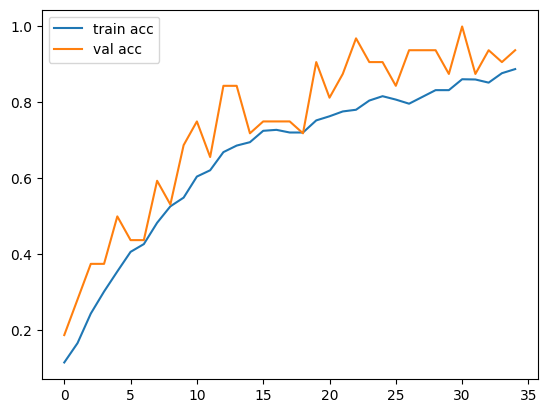

In [95]:
# Accuracies
plt.plot(r.history['accuracy'], label='train acc')
if 'val_accuracy' in r.history:
    plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

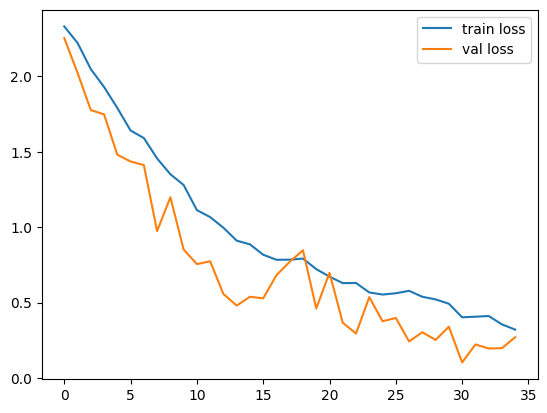

In [96]:
# Loss
plt.plot(r.history['loss'], label='train loss')
if 'val_loss' in r.history:
    plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

2/2 [==============================] - 0s 31ms/step


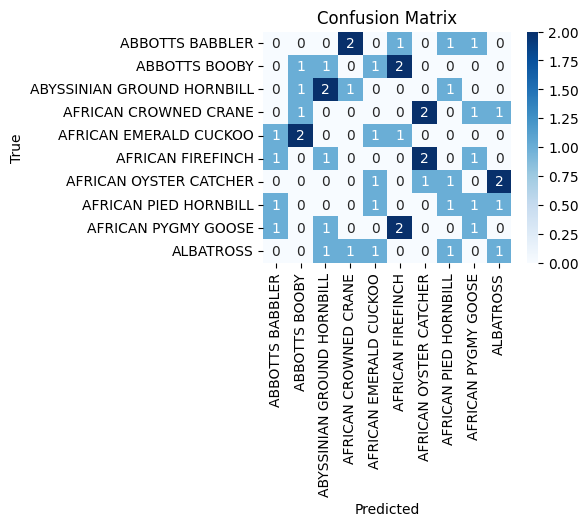

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Get true labels and predicted labels for the test set
Y_true = test_generator.classes
Y_pred = model.predict(test_generator).argmax(axis=1)

# Compute confusion matrix
cm = confusion_matrix(Y_true, Y_pred)

# Get class names
class_names = list(test_generator.class_indices.keys())

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [98]:
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Input, Lambda, Dense, Flatten
import tensorflow as tf

model1 = load_model('./VGG16model1.h5',compile=False)

In [99]:
lab = train_generator.class_indices
lab={k:v for v,k in lab.items()}

In [100]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

1/1 [==============================] - 0s 137ms/step


'ABYSSINIAN GROUND HORNBILL'

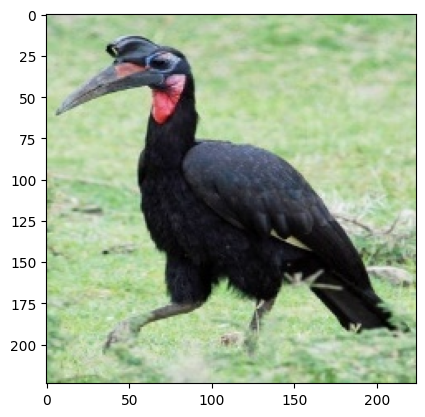

In [101]:
img='/content/newexample/valid/ABYSSINIAN GROUND HORNBILL/3.jpg'
pic=load_img(img,target_size=(224,224,3))
plt.imshow(pic)
output(img)

1/1 [==============================] - 0s 40ms/step


'AFRICAN FIREFINCH'

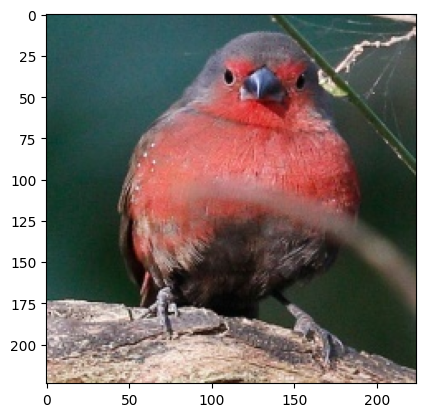

In [102]:
img = '/content/newexample/valid/AFRICAN FIREFINCH/4.jpg'
pic = load_img(img, target_size = (224, 224, 3))
plt.imshow(pic)
output(img)

1/1 [==============================] - 0s 150ms/step


'AFRICAN EMERALD CUCKOO'

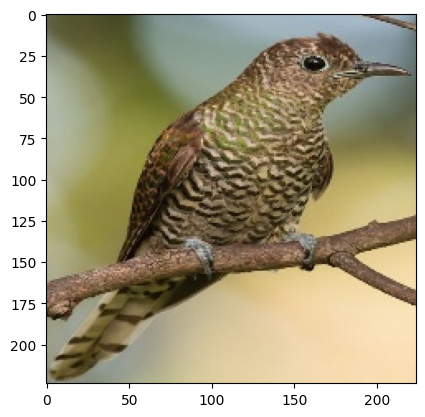

In [106]:
img='/content/newexample/valid/AFRICAN EMERALD CUCKOO/2.jpg'
pic=load_img(img,target_size=(224,224,3))
plt.imshow(pic)
output(img)